In [330]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [332]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [333]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [334]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [335]:
print('Missing data:')
print(housing.isnull().sum(), end = '\n\n') 
print('Percentage of missing data:')
print(np.round(housing.isnull().mean(), decimals = 2))

Missing data:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing data:
longitude             0.00
latitude              0.00
housing_median_age    0.00
total_rooms           0.00
total_bedrooms        0.01
population            0.00
households            0.00
median_income         0.00
median_house_value    0.00
ocean_proximity       0.00
dtype: float64


In [336]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [337]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


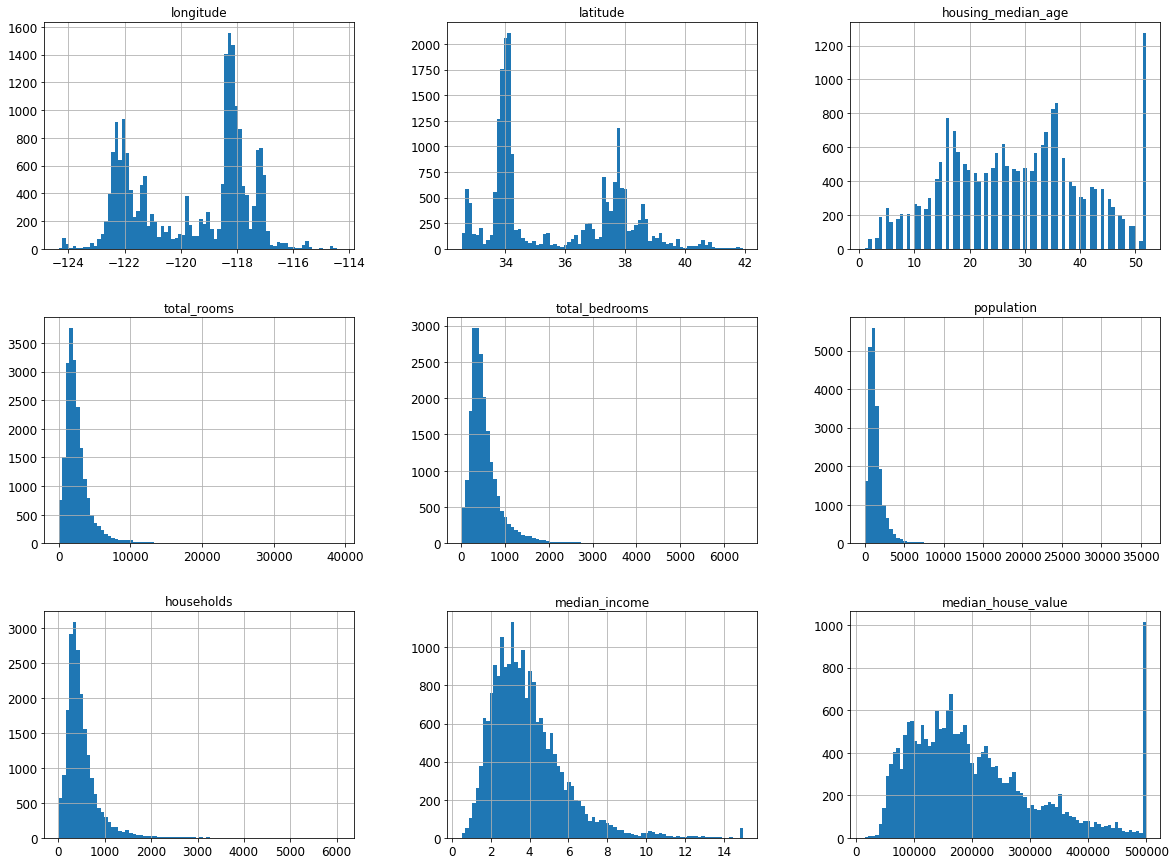

In [338]:
%matplotlib inline
housing.hist(bins = 80, figsize = (20,15))
plt.show()

In [339]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

X = housing.drop('median_house_value', axis = 1)
y = housing['median_house_value']

In [340]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
housing_train = pd.concat([X_train, y_train], axis = 1)
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000,96500.0


In [342]:
housing_test = pd.concat([X_test, y_test], axis = 1)
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND,4.192201,NaN,3.877437,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND,5.039384,NaN,2.679795,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY,3.977155,NaN,1.360332,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN,6.163636,NaN,3.444444,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,NaN,2.483645,278000.0


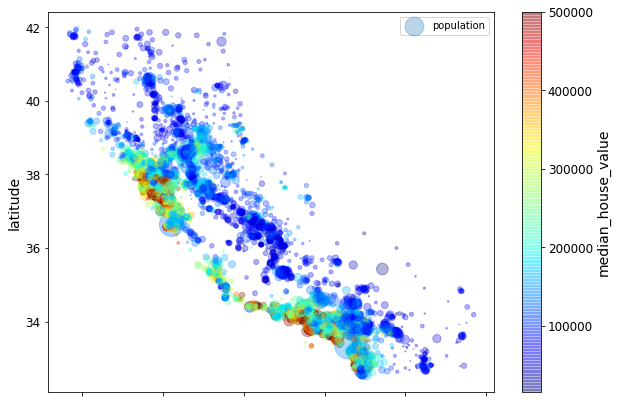

In [358]:
housing_train.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3, c = 'median_house_value', 
            s = housing_train['population']/50, cmap = plt.get_cmap('jet'), colorbar = True, label = 'population', 
             figsize = (10,7))
plt.legend()
plt.show()

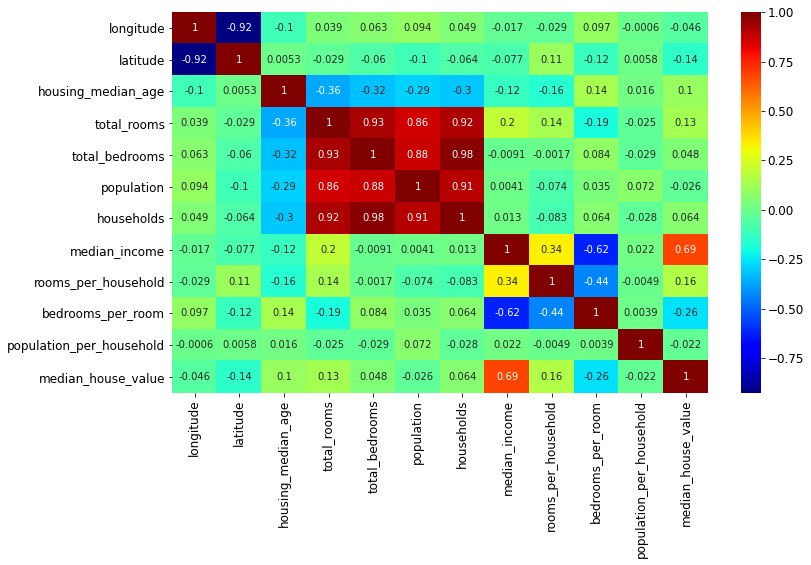

In [344]:
fig, ax = plt.subplots(figsize = (12,7))
sns.heatmap(housing_train.corr(), annot = True, cmap = plt.get_cmap('jet'), ax = ax);

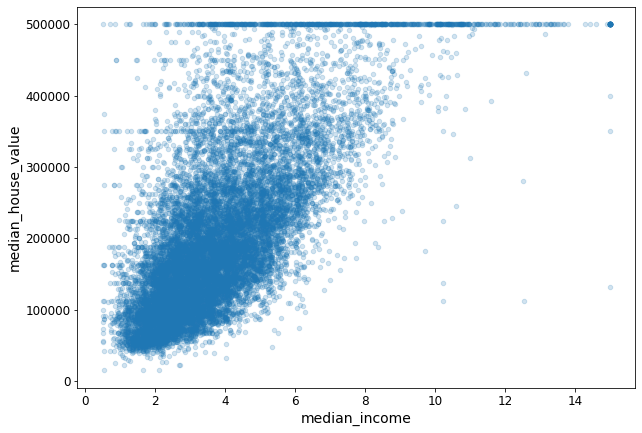

In [345]:
housing_train.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.2, figsize = (10,7));
# Price cap is clearly visible at $500,000.

In [346]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
X_train_num = X_train.drop('ocean_proximity', axis = 1)
imputer.fit(X_train_num)
num = imputer.transform(X_train_num)

X_train = pd.DataFrame(num, columns = X_train_num.columns, index = X_train_num.index)

In [347]:
housing_train_cat = housing_train[['ocean_proximity']]
print(housing_train_cat.head(10))

      ocean_proximity
14196      NEAR OCEAN
8267       NEAR OCEAN
17445      NEAR OCEAN
14265      NEAR OCEAN
2271           INLAND
17848       <1H OCEAN
6252        <1H OCEAN
9389         NEAR BAY
6113        <1H OCEAN
6061        <1H OCEAN


In [348]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891


In [349]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_train_cat_encoded = ordinal_encoder.fit_transform(housing_train_cat)
print(housing_train_cat_encoded[:10])

[[4.]
 [4.]
 [4.]
 [4.]
 [1.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]]


In [350]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [351]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_train_cat_1hot = cat_encoder.fit_transform(housing_train_cat)
housing_train_cat_1hot # SciPy sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [352]:
housing_train_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [353]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [354]:
X_test = X_test.drop('ocean_proximity', axis = 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [356]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [357]:
X_test

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.52068576,
                nan,  0.06740798],
       [ 0.06097472, -0.23549054,  0.11043502, ..., -0.16581537,
                nan, -0.03602975],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.61076476,
                nan, -0.14998876],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.75501156,
        -1.41376846, -0.02646898],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.06124296,
        -0.46519652, -0.04390537],
       [ 0.60445493, -0.66608108, -0.92113763, ..., -0.6058703 ,
         0.79725091,  0.05466644]])

In [325]:
dfx = pd.DataFrame(X_test)
dfy = pd.DataFrame(y_test)

In [326]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.285347,0.195100,-0.286324,-0.522862,NaN,-0.030301,-0.370087,-1.155085,-0.520686,NaN,0.067408
1,0.060975,-0.235491,0.110435,0.138415,NaN,0.121851,0.220532,-0.708659,-0.165815,NaN,-0.036030
2,-1.424870,1.009478,1.856173,0.546310,NaN,-0.102419,1.215396,-0.210402,-0.610765,NaN,-0.149989
3,0.429943,-0.637999,-0.921138,0.188080,NaN,0.244979,-0.013091,0.975113,0.305115,NaN,0.030011
4,-1.170581,0.457199,0.427842,-0.133821,NaN,-0.319653,-0.188964,-0.081794,0.024193,NaN,-0.052971


In [327]:
dfy.head()

,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0


In [328]:
a = list(dfx[dfx.loc[:,4].isnull()].index)
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206]


In [329]:
dfy.index

Int64Index([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,
             5723,
            ...
             4653,  1783,  7608,     0, 10155, 15362, 16623, 18086,  2144,
             3665],
           dtype='int64', length=4128)

In [303]:
from sklearn.metrics import mean_squared_error

lin_reg_RMSE = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
print('Root Mean Square Error:', lin_reg_RMSE)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').